In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('CO22339_soil_measures.csv')
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset.head()

,N,P,K,ph,crop
0,76,23,44,6.91,wheat
1,55,32,35,6.20,wheat
2,56,32,45,5.92,wheat
3,71,40,44,6.15,wheat
4,70,38,39,6.09,rice


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
Labelencoder = LabelEncoder()
y = Labelencoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

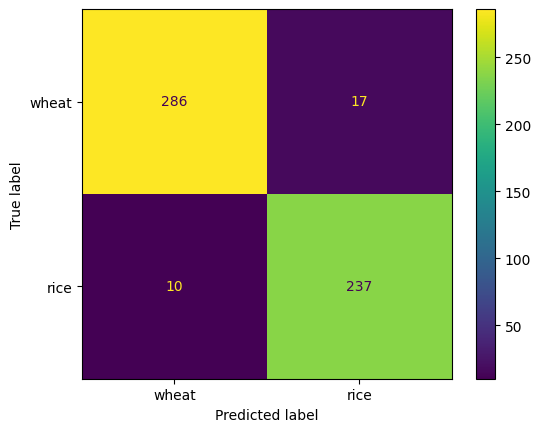

In [ ]:
classes = dataset.crop.unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score
print("The accuracy score is:", accuracy_score(y_test, y_pred))
print("The precision score is:", precision_score(y_test, y_pred, average='macro'))
print("The recall score is:",recall_score(y_test, y_pred, average='macro'))
print("The f1_score score is:", f1_score(y_test, y_pred, average='macro'))

The accuracy score is: 0.9509090909090909
The precision score is: 0.9496435411789743
The recall score is: 0.9517042797397148
The f1_score score is: 0.9505163296112282


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_prob = classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
auc = roc_auc_score(y_test, y_prob[:, 1])

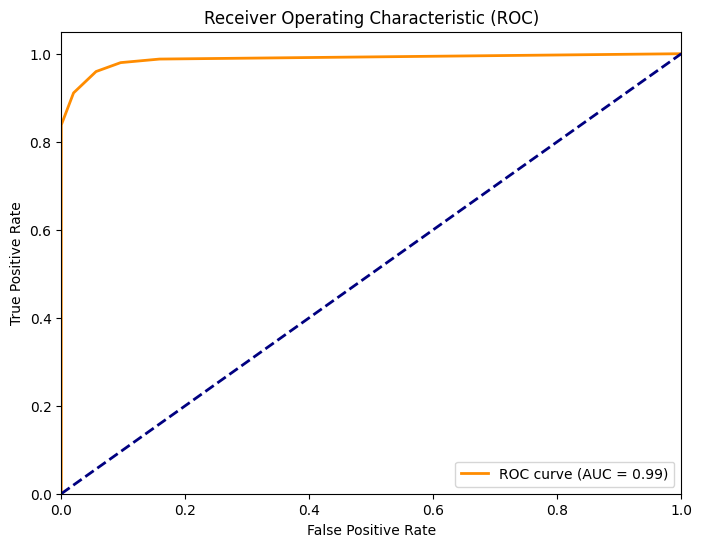

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

SVM

In [ ]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel='linear', random_state=0 )
classifier_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred_svm = classifier_svm.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

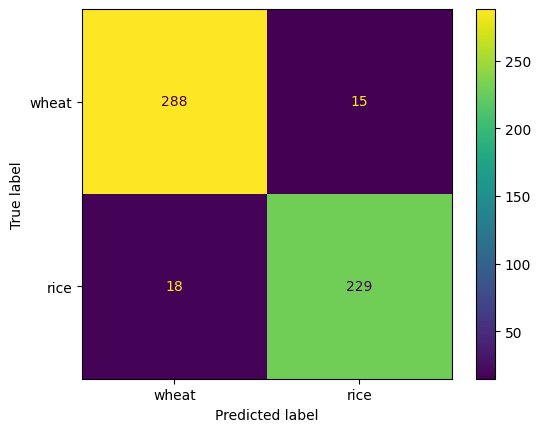

In [ ]:
classes = dataset.crop.unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=classes)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score
print("The accuracy score is:", accuracy_score(y_test, y_pred_svm))
print("The precision score is:", precision_score(y_test, y_pred_svm, average='macro'))
print("The recall score is:",recall_score(y_test, y_pred_svm, average='macro'))
print("The f1_score score is:", f1_score(y_test, y_pred_svm, average='macro'))

The accuracy score is: 0.94
The precision score is: 0.9398505303760849
The recall score is: 0.9388102777889125
The f1_score score is: 0.93930151595718


Kernel SVM

In [ ]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'rbf', random_state = 0)
classifier_svc.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred_svc = classifier_svc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)

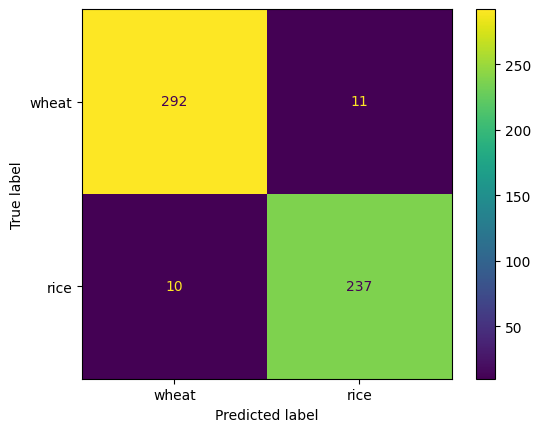

In [ ]:
classes = dataset.crop.unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=classes)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score
print("The accuracy score is:", accuracy_score(y_test, y_pred_svc))
print("The precision score is:", precision_score(y_test, y_pred_svc, average='macro'))
print("The recall score is:",recall_score(y_test, y_pred_svc, average='macro'))
print("The f1_score score is:", f1_score(y_test, y_pred_svc, average='macro'))

The accuracy score is: 0.9618181818181818
The precision score is: 0.9612662892544328
The recall score is: 0.9616052698387247
The f1_score score is: 0.9614325068870524


NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = classifier_nb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

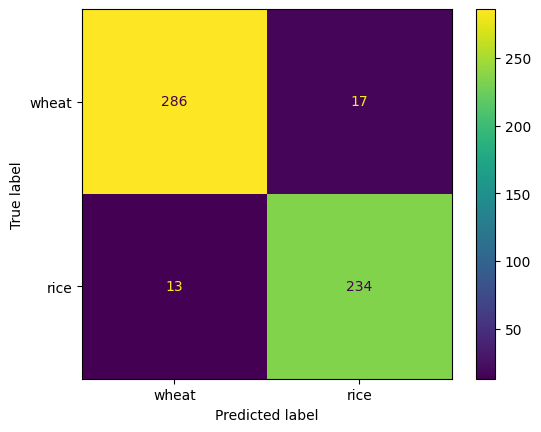

In [ ]:
classes = dataset.crop.unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=classes)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score
print("The accuracy score is:", accuracy_score(y_test, y_pred_nb))
print("The precision score is:", precision_score(y_test, y_pred_nb, average='macro'))
print("The recall score is:",recall_score(y_test, y_pred_nb, average='macro'))
print("The f1_score score is:", f1_score(y_test, y_pred_nb, average='macro'))

The accuracy score is: 0.9454545454545454
The precision score is: 0.944396327732548
The recall score is: 0.9456314052457877
The f1_score score is: 0.9449625745506944


DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state=42)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = classifier_dt.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

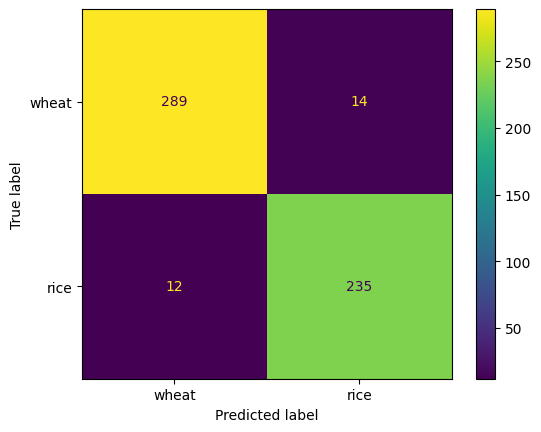

In [ ]:
classes = dataset.crop.unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=classes)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score
print("The accuracy score is:", accuracy_score(y_test, y_pred_dt))
print("The precision score is:", precision_score(y_test, y_pred_dt, average='macro'))
print("The recall score is:",recall_score(y_test, y_pred_dt, average='macro'))
print("The f1_score score is:", f1_score(y_test, y_pred_dt, average='macro'))

The accuracy score is: 0.9527272727272728
The precision score is: 0.9519539953835274
The recall score is: 0.9526061917932684
The f1_score score is: 0.9522671437726982


RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=10, random_state=0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [ ]:
y_pred_rf = classifier_rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

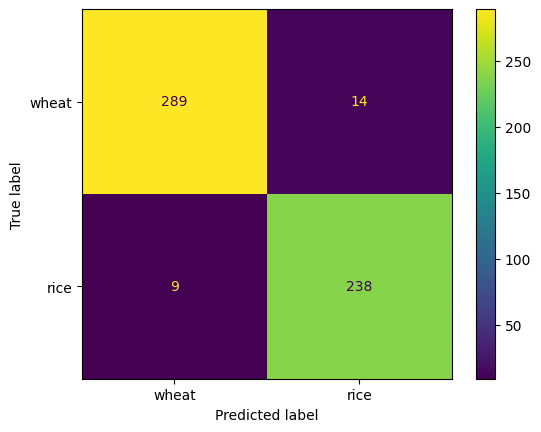

In [ ]:
classes = dataset.crop.unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=classes)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score
print("The accuracy score is:", accuracy_score(y_test, y_pred_rf))
print("The precision score is:", precision_score(y_test, y_pred_rf, average='macro'))
print("The recall score is:",recall_score(y_test, y_pred_rf, average='macro'))
print("The f1_score score is:", f1_score(y_test, y_pred_rf, average='macro'))

The accuracy score is: 0.9581818181818181
The precision score is: 0.9571215510812826
The recall score is: 0.9586790662871956
The f1_score score is: 0.9578191324412553


In [ ]:
results = {
    'Model': ['KNN', 'SVM', 'Kernel SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred),
                 accuracy_score(y_test, y_pred_svm),
                 accuracy_score(y_test, y_pred_svc),
                 accuracy_score(y_test, y_pred_nb),
                 accuracy_score(y_test, y_pred_dt),
                 accuracy_score(y_test, y_pred_rf)],
    'Precision': [precision_score(y_test, y_pred, average='macro'),
                  precision_score(y_test, y_pred_svm, average='macro'),
                  precision_score(y_test, y_pred_svc, average='macro'),
                  precision_score(y_test, y_pred_nb, average='macro'),
                  precision_score(y_test, y_pred_dt, average='macro'),
                  precision_score(y_test, y_pred_rf, average='macro')],
    'Recall': [recall_score(y_test, y_pred, average='macro'),
              recall_score(y_test, y_pred_svm, average='macro'),
              recall_score(y_test, y_pred_svc, average='macro'),
              recall_score(y_test, y_pred_nb, average='macro'),
              recall_score(y_test, y_pred_dt, average='macro'),
              recall_score(y_test, y_pred_rf, average='macro')],
    'F1-Score': [f1_score(y_test, y_pred, average='macro'),
                f1_score(y_test, y_pred_svm, average='macro'),
                f1_score(y_test, y_pred_svc, average='macro'),
                f1_score(y_test, y_pred_nb, average='macro'),
                f1_score(y_test, y_pred_dt, average='macro'),
                f1_score(y_test, y_pred_rf, average='macro')]
}

df = pd.DataFrame(results)
print("Model Comparison Table")
display(df)

Model Comparison Table


,Model,Accuracy,Precision,Recall,F1-Score
0,KNN,0.950909,0.949644,0.951704,0.950516
1,SVM,0.940000,0.939851,0.938810,0.939302
2,Kernel SVM,0.961818,0.961266,0.961605,0.961433
3,Naive Bayes,0.945455,0.944396,0.945631,0.944963
4,Decision Tree,0.952727,0.951954,0.952606,0.952267
5,Random Forest,0.958182,0.957122,0.958679,0.957819
